# Section 4: Linear Regression
The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

![DiffLinearRegression](../media/DiffLinearRegression.png)

The linear regression model can be represented by the following equation
![LinearRegression](../media/LinearRegression.png)

**Y** is the predicted value
**θ₀** is the bias term.
**θ₁,…,θₙ** are the model parameters
**x₁, x₂,…,xₙ** are the feature values.

The line for which the the error between the predicted values and the observed values is minimum is called the best fit line or the regression line. These errors are also called as residuals. The residuals can be visualized by the vertical lines from the observed data value to the regression line.

![LinearRegressionLine](../media/LinearRegressionLine.png)

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by
![costFunction](./media/costFunction.png)
where the hypothesis function h(x) is denoted by
![hypothesisFunction](./media/hypothesisFunction.png)
and m is the total number of training examples in our data-set.

Our objective is to find the model parameters so that the cost function is minimum.

# Importing the libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# Load Data

In [4]:
dataset=pd.read_csv('../data/Ecommerce Customers.csv') 
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
print("The dataset contains following number of records with null values for each of the columns : \n" +str(dataset.isnull().sum()))

The dataset contains following number of records with null values for each of the columns : 
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [ ]:
# Set 'Avg Session Length','Time on App','Time on Website' and 'Length of Membership' as input features
x = dataset.loc[:, ['Avg. Session Length','Time on App','Time on Website','Length of Membership']].values
# Set 'Yearly Amount Spent' as target (dependent variable)
y = dataset.loc[:, 'Yearly Amount Spent'].values

In [ ]:
# print sample data
print("Input features (x): \n", x[:5])
print("Target variable (y): \n", y[:5])

Input features (x): 
 [[34.49726773 12.65565115 39.57766802  4.08262063]
 [31.92627203 11.10946073 37.26895887  2.66403418]
 [33.00091476 11.33027806 37.11059744  4.1045432 ]
 [34.30555663 13.71751367 36.72128268  3.12017878]
 [33.33067252 12.79518855 37.5366533   4.44630832]]
Target variable (y): 
 [587.95105397 392.20493344 487.54750487 581.85234404 599.40609205]


# Splitting the dataset into training and test set  

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 

In [20]:
# Print the shapes of the training and test sets
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (350, 4)
Shape of x_test:  (150, 4)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


# Simple Linear Regression

This is the most basic form of linear regression in which the variable to be predicted is dependent on only one other variable. This is calculated by using the formula that is generally used in calculating the slope of a line.

y = w0 + w1*x1

In the above equation, y refers to the target variable and x1 refers to the independent variable. w1 refers to the coeeficient that expresses the relationship between y and x1 is it also know as the slope. w0 is the constant cooefficient a.k.a the intercept. It refers to the constant offset that y will always be with respect to the independent variable.

In this example, we consider 'Length of Membership' as the only independent variable 


In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Build Model
# In this example we consider 'Length of Membership' as the only independent variable, which is the last column in the dataset.
# We fit the model using the last column of x_train and y_train.
# This means we are using 'Length of Membership' to predict 'Yearly Amount Spent'.
regressor.fit(x_train[:,-1].reshape(-1,1),y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# Print model coefficients
print("Coefficient (w1): ", regressor.coef_)
print("Intercept (w0): ", regressor.intercept_)

Coefficient (w1):  [65.64160309]
Intercept (w0):  267.39495748277875


In [44]:
# predicting the test set results and evaluating the model
y_pred = regressor.predict(x_test[:,-1].reshape(-1,1))

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Simple Linear Regression Model Evaluation")
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Simple Linear Regression Model Evaluation
R2 Score:  0.5983019543807417
Mean Absolute Error:  39.77916345031985
Mean Squared Error:  2519.858929685277


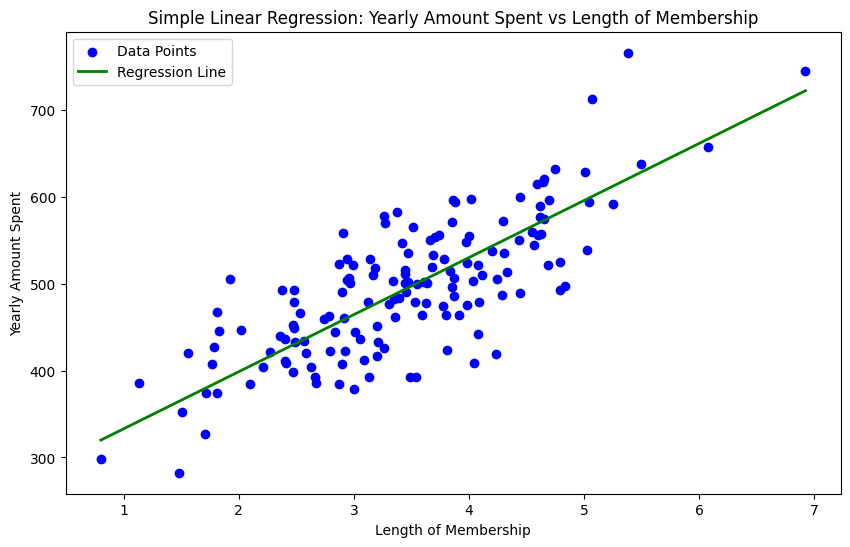

In [46]:
# visualize the results and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,-1], y_test, color='blue', label='Data Points')
# Order the data by 'Length of Membership' for a proper regression line
order = np.argsort(x_test[:,-1])
plt.plot(x_test[order,-1], y_pred[order], color='green', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Yearly Amount Spent vs Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.show()

# Multivariate Linear Regression

Multiple linear regression is an extension to the simple linear regression. In this setup, the target value is dependant on more than one variable. The number of variables depends on the use case at hand. Usually a subject matter expert is involved in identifying the fields that will contribute towards better predicting the output feature.

y = w0 + w1*x1 + w2*x2 + .... + wn*xn

In this example, we consider 'Avg. Session Length', 'Time on App', 'Time on Website', and 'Length of Membership' as the independent variables.

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Build Model
regressor.fit(x_train,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# Print model coefficients
print("Coefficient (w1, w2, ..., wn): ", regressor.coef_)
print("Intercept (w0): ", regressor.intercept_)

Coefficient (w1, w2, ..., wn):  [ 2.57675297e+01  3.88003936e+01 -1.80409231e-02  6.18525679e+01]
Intercept (w0):  -1037.8257485695403


In [55]:
# predicting the test set results and evaluating the model
y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Simple Linear Regression Model Evaluation")
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Simple Linear Regression Model Evaluation
R2 Score:  0.9849262667370622
Mean Absolute Error:  7.851377170861467
Mean Squared Error:  94.55779479273318


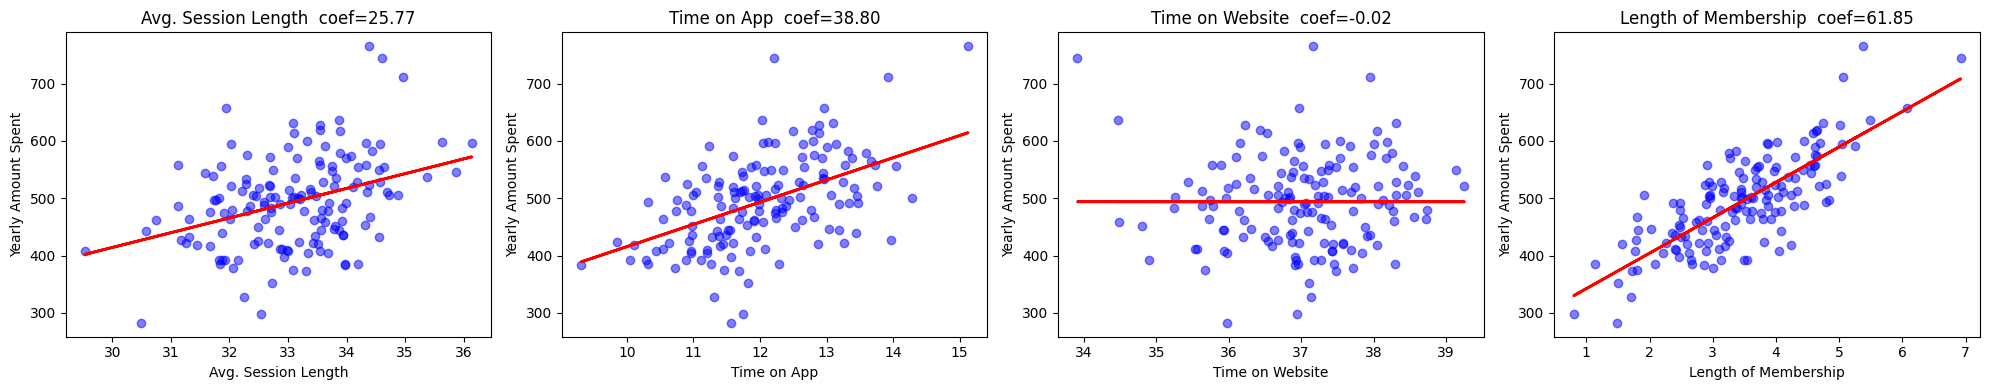

In [64]:
# Visualize the results and regression lines for each feature
columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
fig, axes = plt.subplots(1, x_test.shape[1], figsize=(5*x_test.shape[1],4))
for ax, col in zip(axes, range(x_test.shape[1])):
    ax.scatter(x_test[:, col], y_test, color='blue', alpha=0.5)
    coef = regressor.coef_[col]
    ax.set_title(f"{columns[col]}  coef={coef:.2f}")
    # plot coefficient line, use new intercept for each column just for visualization
    intercept = np.mean(y_test) - coef * np.mean(x_test[:, col])
    ax.plot(x_test[:, col], x_test[:, col] * coef + intercept , color='red', linewidth=2)
    ax.set_xlabel(columns[col])
    ax.set_ylabel('Yearly Amount Spent')
plt.tight_layout()
plt.show()

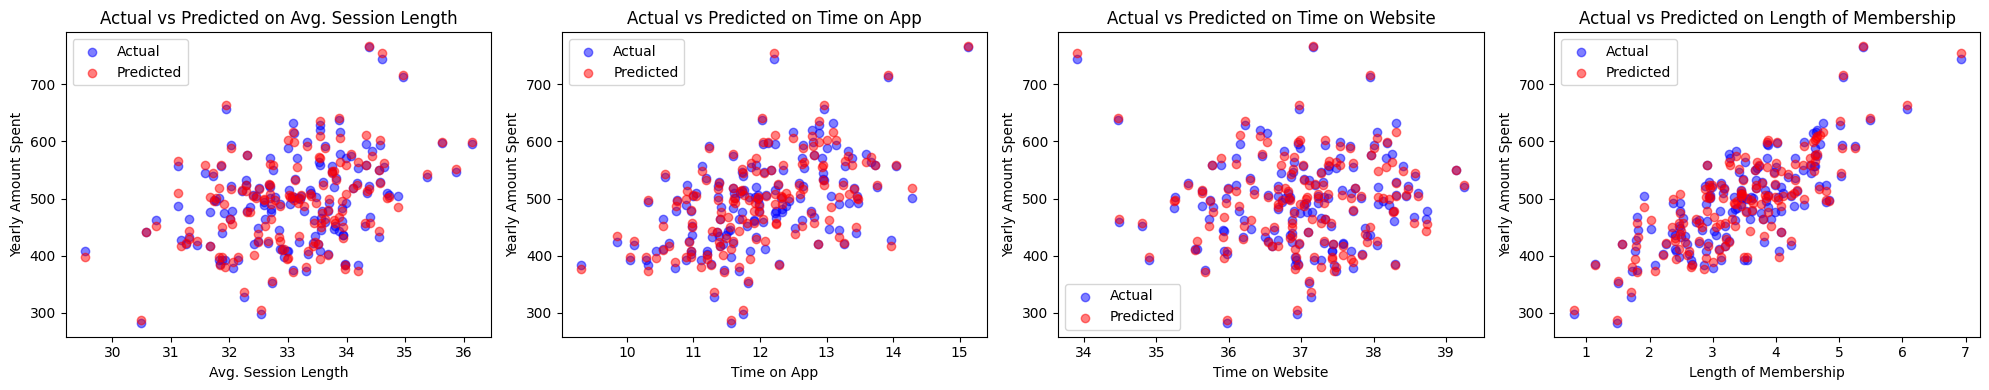

In [68]:
# Visualize actual vs predicted values for each feature
columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
fig, axes = plt.subplots(1, x_test.shape[1], figsize=(5*x_test.shape[1],4))
for col in range(x_test.shape[1]):
    axes[col].scatter(x_test[:, col], y_test, color='blue', alpha=0.5, label='Actual')
    axes[col].set_title(f"Actual vs Predicted on {columns[col]}")
    axes[col].set_xlabel(columns[col])
    axes[col].set_ylabel('Yearly Amount Spent')
    axes[col].scatter(x_test[:, col], y_pred, color='red', alpha=0.5, label='Predicted')
    axes[col].legend()
plt.tight_layout()
plt.show()